# Ejercicio de limepieza de datos con Pandas
##Objetivos


*   Analizar un data set de juegos descargados en Google play store
*   Fuente de datos [android-games.csv](https://drive.google.com/file/d/14FuPIGF-v-vgVIf4nXIibC-uum6KtpR8/view?usp=share_link)

**Información del data set**
Este data set contiene el top 100 de los video hjuegops por categoría en google play store, con información de calificaciones, número de instalaciones y precios.

**Columnas**


- Rank: Posición del videojueo en una categoria en particular.
- Title: Nombre del videojuego.
- Total ratings: Número total de calificaciones.
- Installs: Número de instalaciones apróximado.
- Average rating: Calificación promedio hasta 5.
- Growth (30 days): Crecimiento porcentual en 30 días.
- Growth (60 days): Crecimiento porcentual en 60 días.
- Price: Precio en dolares.
- Category: Categoría del videojuego.
- 5 star ratings: Número de calificaciones de 5 estrellas.
- 4 star ratings: Número de calificaciones de 4 estrellas.
- 3 star ratings: Número de calificaciones de 3 estrellas.
- 2 star ratings: Número de calificaciones de 2 estrellas.
- 1 star ratings: Número de calificaciones de 1 estrella.
- Paid: Es un videojuego pago (True) o gratis (False).

__Aclaraciones__

- El *crecimiento porcentual* se caulcula teniendo en cuenta la cantidad total de instalaciones y la cantidad total de calificaciones, con ello encontrar el porcentaje de crecimiento promedio.
- Cada puesto en el top 100 fue registrado en una día del año, en total 100 días:
            *   01/01/2020: Registro puesto 1
            *   02/01/2020: Registro puesto 2



# Importar las librerias

In [38]:
#Procesamiento
import pandas as pd
import numpy as np
import datetime as dt
#Manejo de valores núlos
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Cargar datos

In [39]:
from google.colab import drive
ruta = '/content/drive/MyDrive/EjerciciosLimpiezaDatos/android-games.csv'

In [40]:
#Leemos el data set de Games androit con Pandas
dataGames = pd.read_csv(ruta)

### Visualizar datos del dataframe


Primeras 5 líneas:

In [41]:
dataGames.head()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1/1/2020,1,Garena Free Fire- World Series,86273129,500.0 M,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,1/2/2020,2,PUBG MOBILE - Traverse,37276732,500.0 M,4.0,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,1/3/2020,3,Mobile Legends: Bang Bang,26663595,100.0 M,4.0,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,1/4/2020,4,Brawl Stars,17971552,100.0 M,4.0,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,1/5/2020,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4.0,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


Últimas 5 líneas:

In [42]:
dataGames.tail()

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1731,1/2/2020,2,The Four Winds by Kristin Hannah,120533,1.0 M,4.0,0.00,0.0,0.0,FICTION BOOK,74096,21404,10592,4736,9702,False
1732,1/3/2020,3,Every Last Fear by Alex Finlay,115437,5.0 M,2.0,0.20,0.5,0.0,FICTION BOOK,85169,16622,6802,1848,4994,True
1733,1/4/2020,4,Fake Accounts by Lauren Oyler,112408,1.0 M,4.0,0.00,1.8,0.0,FICTION BOOK,101036,3607,3237,1229,3297,False
1734,1/1/2020,1,Barack Obama,111595,1.0 M,3.0,0.90,2.3,0.0,BIOGRAPHY BOOK,88950,14856,4297,1385,2103,True
1735,1/2/2020,2,Steve Jobs,110723,10.0 M,4.0,0.76,1.9,0.0,BIOGRAPHY BOOK,64184,18332,9385,6688,12132,True


Muestra aleatoria:

In [43]:
dataGames.sample(5)

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
607,3/22/2020,82,Winning Slots casino games:free vegas slot mac...,107253,5.0 M,4.0,0.3,0.7,0.0,GAME CASINO,83222,6679,4141,3006,10203,False
333,2/3/2020,34,Game of Dice,295628,5.0 M,4.0,0.2,0.3,0.0,GAME BOARD,194900,45677,20155,8733,26161,False
395,4/5/2020,96,Dr. Gomoku,92362,5.0 M,3.0,0.1,0.1,0.0,GAME BOARD,52380,14466,8352,3196,13966,False
932,1/7/2020,7,Where's My Water? 2,2151126,100.0 M,4.0,0.2,0.5,0.0,GAME PUZZLE,1461033,221781,145555,76086,246668,False
1361,2/5/2020,36,Flip Diving,882096,50.0 M,4.0,0.3,0.8,0.0,GAME SPORTS,665550,89779,45159,21600,60005,False


Tamaño del dataframe:

In [44]:
dataGames.shape

(1736, 16)

## Análisis exploratorio de datos

### General

In [45]:
dataGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1736 non-null   object 
 1   rank              1736 non-null   int64  
 2   title             1736 non-null   object 
 3   total ratings     1736 non-null   int64  
 4   installs          1736 non-null   object 
 5   average rating    1728 non-null   float64
 6   growth (30 days)  1736 non-null   float64
 7   growth (60 days)  1736 non-null   float64
 8   price             1736 non-null   float64
 9   category          1736 non-null   object 
 10  5 star ratings    1736 non-null   int64  
 11  4 star ratings    1736 non-null   int64  
 12  3 star ratings    1736 non-null   int64  
 13  2 star ratings    1736 non-null   int64  
 14  1 star ratings    1736 non-null   int64  
 15  paid              1729 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory 

- Podemos observar valores nulos en las variables *paid* y *average rating*.
- El tipo de dato de la fecha es *Object* así como el de la variable *installs*.

In [46]:
dataGames.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1736.000000,1.736000e+03,1728.00000,1736.000000,1736.000000,1736.000000,1.736000e+03,1.736000e+03,1.736000e+03,1.736000e+03,1.736000e+03
mean,50.220046,1.110679e+06,3.90625,320.626187,122.139113,0.010904,7.964405e+05,1.189283e+05,5.870517e+04,2.824129e+04,1.083608e+05
std,29.025100,3.988018e+06,0.29551,6008.527713,2250.002200,0.214616,2.948668e+06,3.232236e+05,1.668288e+05,9.569178e+04,5.046927e+05
min,1.000000,3.299300e+04,2.00000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.742272e+05,4.00000,0.100000,0.200000,0.000000,1.268265e+05,2.056625e+04,9.609000e+03,4.235000e+03,1.265300e+04
50%,50.000000,4.276935e+05,4.00000,0.500000,1.000000,0.000000,2.957355e+05,5.085100e+04,2.494450e+04,1.061450e+04,3.359650e+04
75%,75.000000,8.837410e+05,4.00000,1.700000,3.300000,0.000000,6.184412e+05,1.016020e+05,5.208700e+04,2.320825e+04,8.010575e+04
max,100.000000,8.627313e+07,4.00000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


In [47]:
dataGames.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1736.0,5.022005e+01,2.902510e+01,1.0,25.00,50.0,75.00,100.00
total ratings,1736.0,1.110679e+06,3.988018e+06,32993.0,174227.25,427693.5,883741.00,86273129.00
average rating,1728.0,3.906250e+00,2.955102e-01,2.0,4.00,4.0,4.00,4.00
growth (30 days),1736.0,3.206262e+02,6.008528e+03,0.0,0.10,0.5,1.70,227105.70
growth (60 days),1736.0,1.221391e+02,2.250002e+03,0.0,0.20,1.0,3.30,69441.40
price,1736.0,1.090438e-02,2.146162e-01,0.0,0.00,0.0,0.00,7.49
5 star ratings,1736.0,7.964405e+05,2.948668e+06,13975.0,126826.50,295735.5,618441.25,63546766.00
4 star ratings,1736.0,1.189283e+05,3.232236e+05,2451.0,20566.25,50851.0,101602.00,5404966.00
3 star ratings,1736.0,5.870517e+04,1.668288e+05,718.0,9609.00,24944.5,52087.00,3158756.00
2 star ratings,1736.0,2.824129e+04,9.569178e+04,266.0,4235.00,10614.5,23208.25,2122183.00


- En las variables *growth (30 days)* y *growth (60 days)* se observa el valor máximo en una escala superior a los demás valores.

## Visualizaciones
Distribución del promedio de calificaciones:

(array([   2.,    0.,    0.,    0.,    0.,  158.,    0.,    0.,    0.,
        1568.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

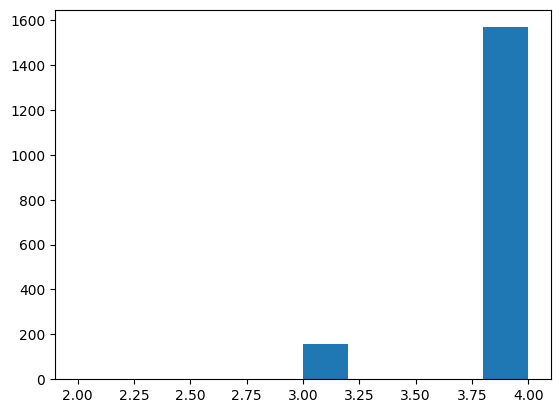

In [48]:
##Utilizamos la librería matplotlib
plt.hist(dataGames['average rating'])

- La mayoría de los juegos que entran en el top 100 por categoría reciben una calificación promedio de 4 estrellas.
Cantidad de videojuegos pagos y gratis:

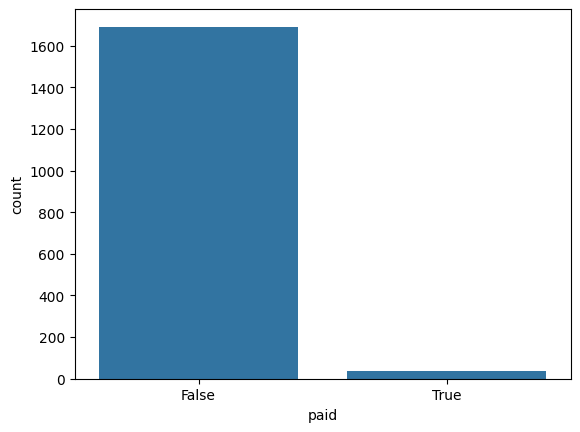

In [49]:
##Utilizamos la librería Seaborn
sns.countplot(x='paid',data=dataGames);

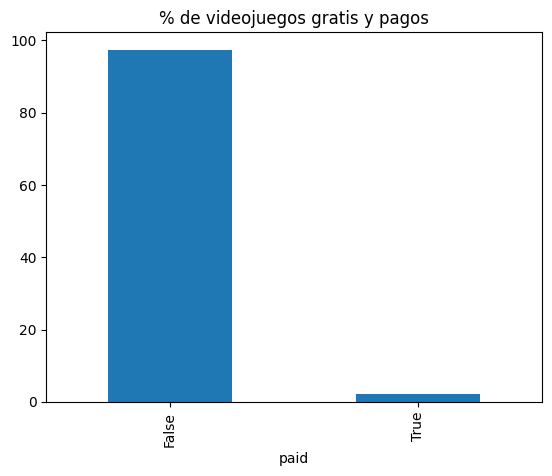

In [50]:
plot = (100 * dataGames['paid'].value_counts() / len(dataGames['paid'])).plot(kind='bar', title='% de videojuegos gratis y pagos')

- Más del 90% de los videojuegos que están dentro del top 100 son gratis.

In [51]:
# Plotly
fig = go.Figure()
fig.add_trace(go.Box(y=dataGames['growth (30 days)']))
fig.add_trace(go.Box(y=dataGames['growth (60 days)']))

fig.show()

### Descriptivas
Descripción de variables categóricas:

In [52]:
dataGames.describe(include='O')

,Date,title,installs,category,paid
count,1736,1736,1736,1736,1729
unique,121,1681,9,22,2
top,1/3/2020,Solitaire,10.0 M,GAME CARD,False
freq,21,36,806,125,1691


- Para la fecha podemos observar 121 datos únicos, pero si cada puesto se registró en un día del año este valor debería ser 100.
- El videojuego que aparece más veces en el top es Solitaire.
- La variable *installs* es categórica.


Valores únicos de las Categorías:

In [53]:
dataGames['category'].unique()

array(['GAME ACTION', 'game action', 'GAME ADVENTURE', 'GAME ARCADE',
       'GAME BOARD', 'GAME CARD', 'game card', 'GAME CASINO',
       'GAME CASUAL', 'GAME EDUCATIONAL', 'GAME MUSIC', 'game music',
       'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD', 'FICTION BOOK', 'BIOGRAPHY BOOK'], dtype=object)

- Observamos las siguientes categorías:
  - *game action*
  - *game card*
  - *FICTION BOOK*
  - *BIOGRAPHY BOOK*

Valores únicos de Fecha:

In [54]:
dataGames['Date'].unique()

array(['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020',
       '1/6/2020', '1/7/2020', '1/8/2020', '1/9/2020', '1/10/2020',
       '1/11/2020', '1/12/2020', '1/13/2020', '1/14/2020', '1/15/2020',
       '1/16/2020', '1/17/2020', '1/18/2020', '1/19/2020', '1/20/2020',
       '1/21/2020', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020',
       '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020',
       '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020',
       '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020',
       '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020',
       '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020',
       '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020',
       '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020',

- Observamos dos formatos para la columna *Date*


Valores únicos de la columna *installs*

In [55]:
dataGames['installs'].unique()

array(['500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M',
       '1000.0 M', '500.0 k', '100.0 k'], dtype=object)

- Los valores contienen letras que indican:

  *   M: *1000000
  *   k: *1000

## Perspectivas
- Valores nulos en las variables *paid* y *average rating*.
- Tipo de dato de la fecha es *Object*.
- Fecha con formatos distintos.
- Variable *installs* es categórica.
- Variables *growth (30 days)* y *growth (60 days)* con datos atípicos.


### Valores nulos
Validemos cuántos datos nulos existen:

In [56]:
#Valores nulos por columna
missing_values_count  = dataGames.isna().sum()
missing_values_count

Date                0
rank                0
title               0
total ratings       0
installs            0
average rating      8
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                7
dtype: int64

In [57]:
total_cells = np.product(dataGames.shape)
total_cells

27776

In [58]:
total_missing = missing_values_count.sum()
total_missing

15

In [59]:
(total_missing/total_cells) * 100

0.05400345622119816

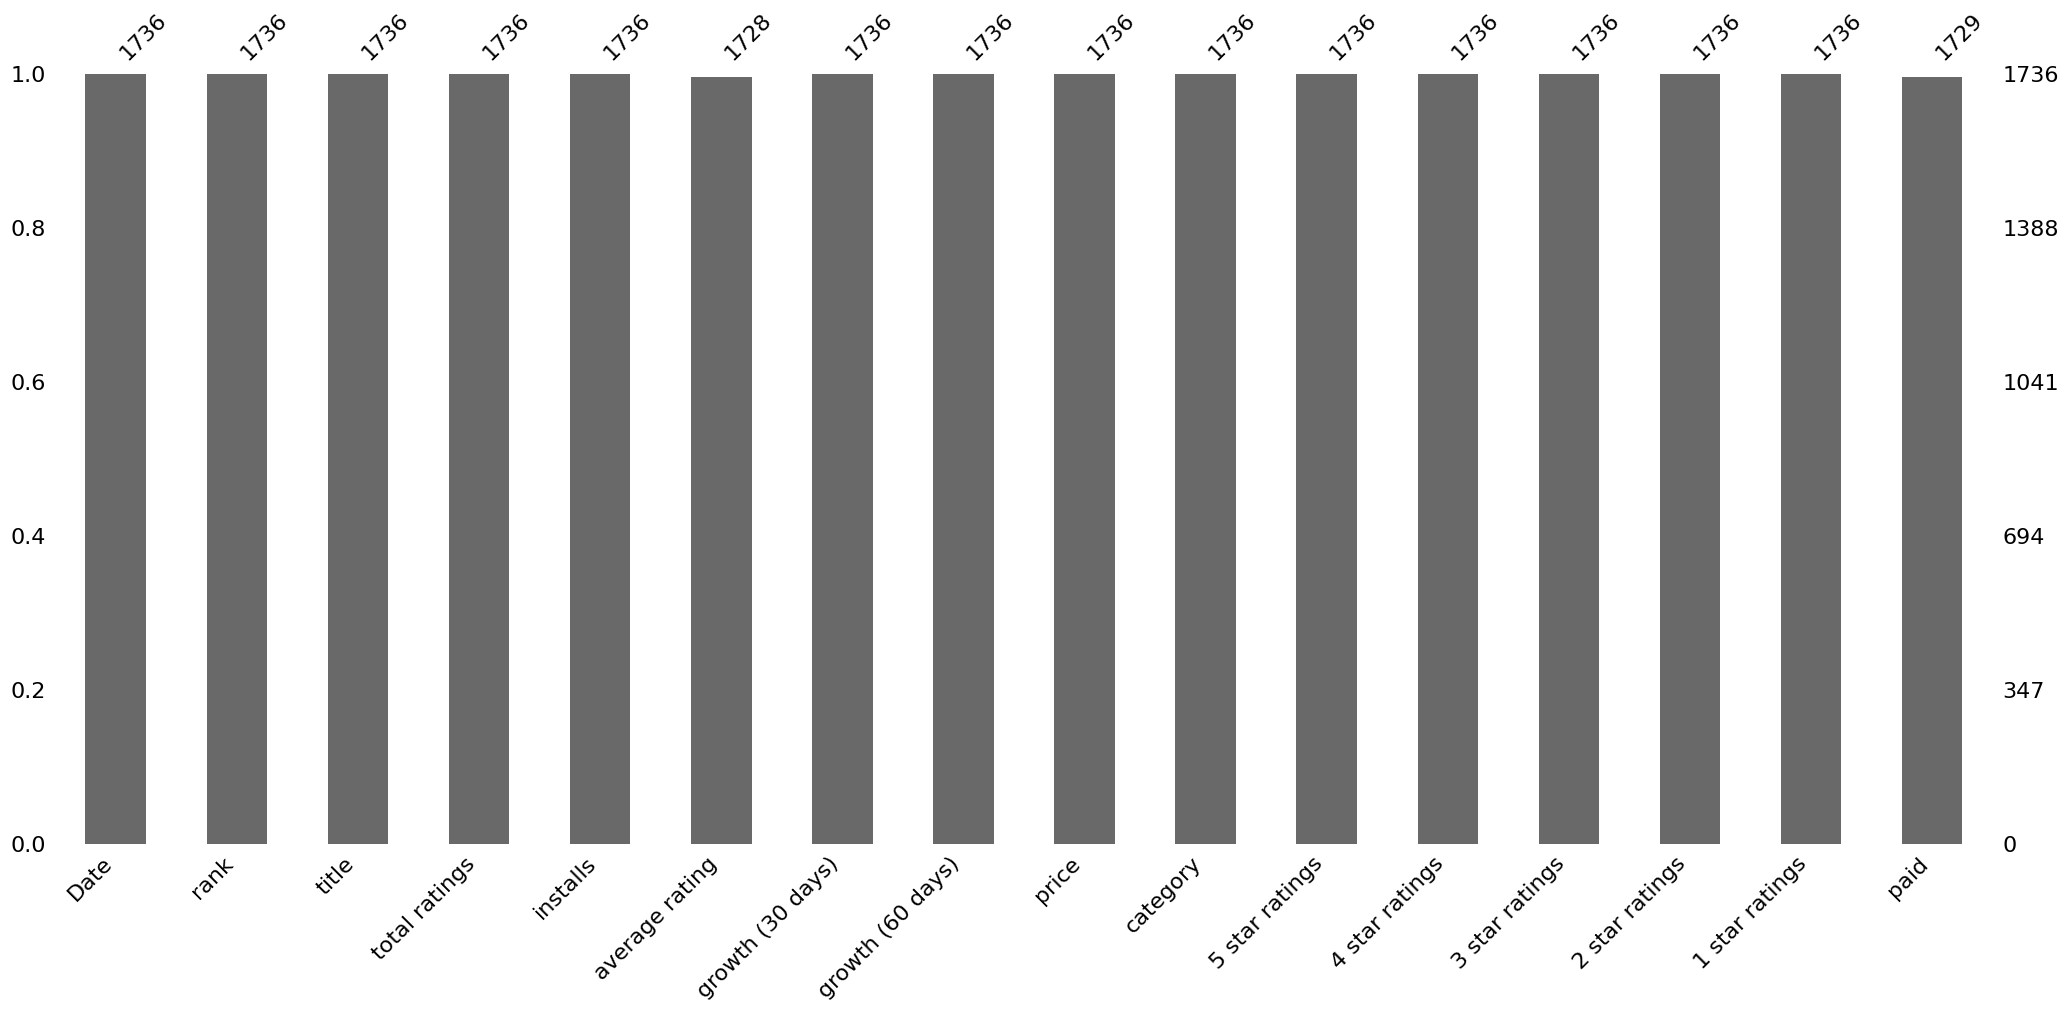

In [60]:
#Visualizar cantidad de datos por columna
msno.bar(dataGames);

- En la gráfica anterior no se logra observar cuáles columnas tienen datos nulos.

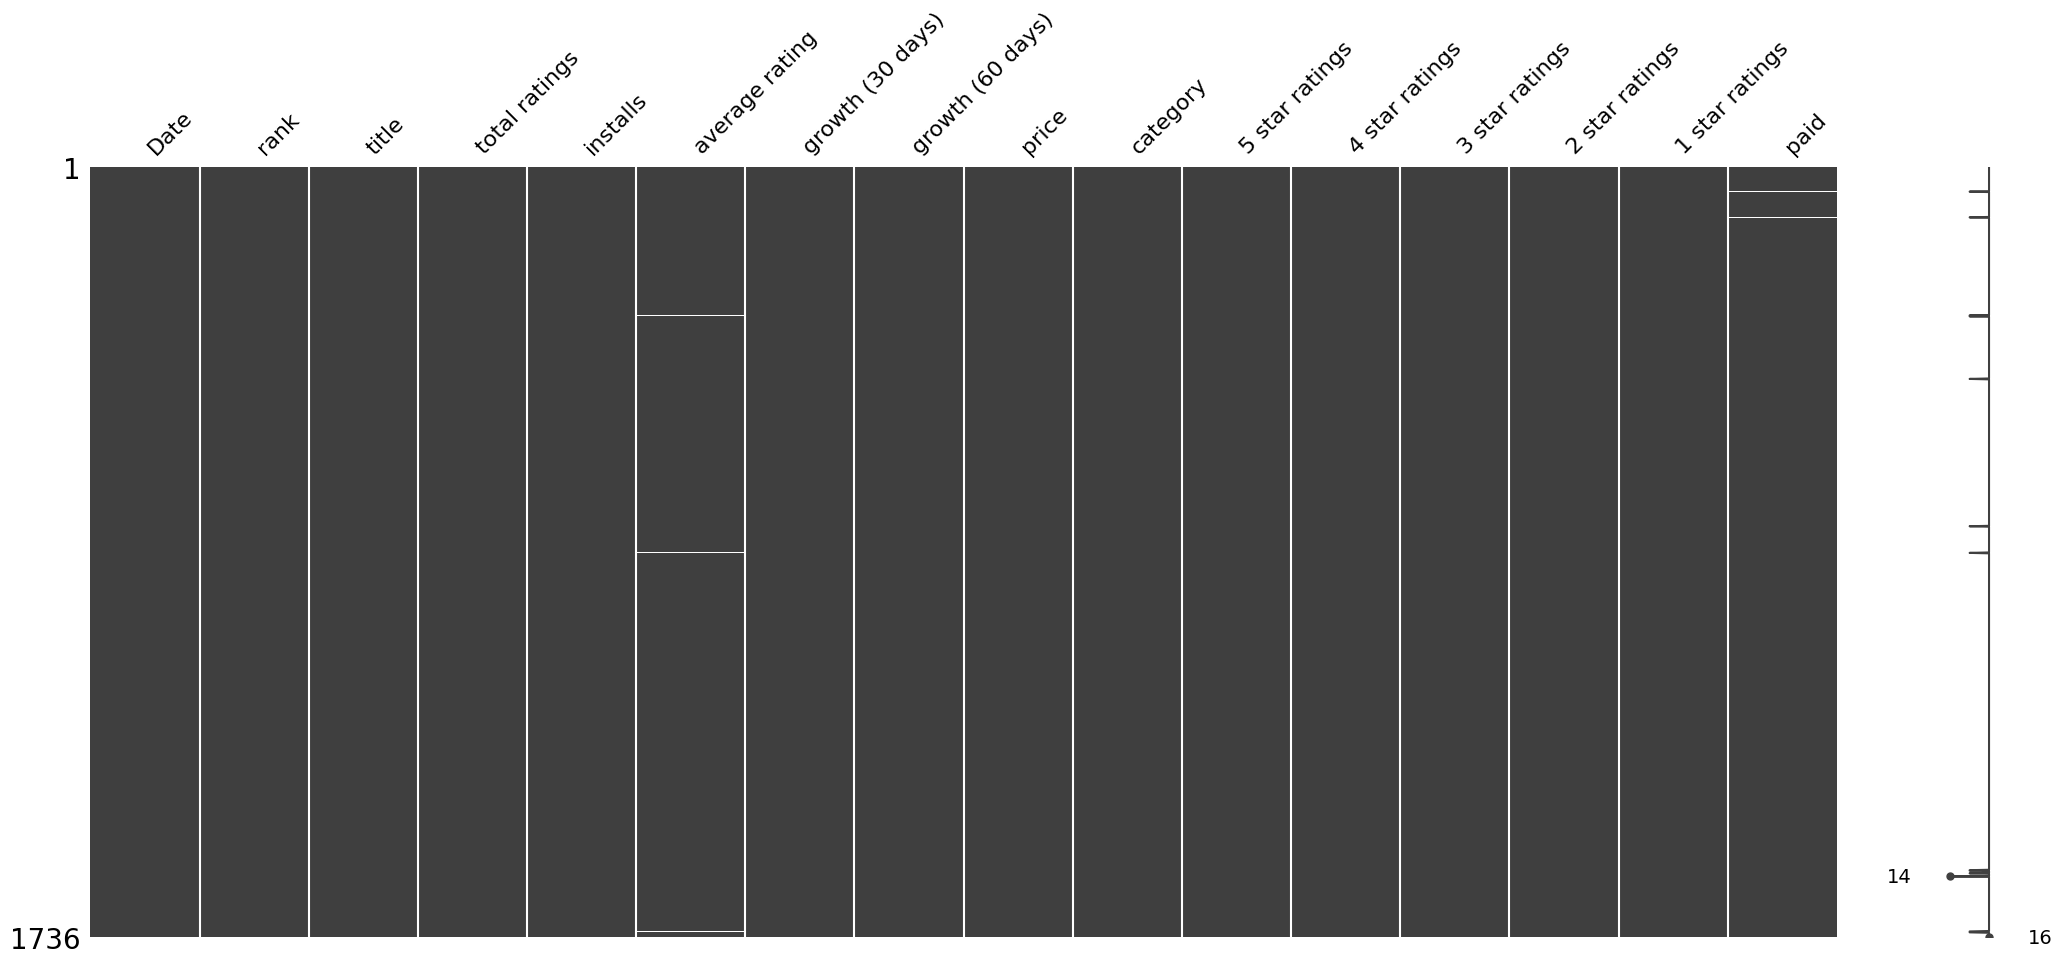

In [61]:
msno.matrix(dataGames);

¿Podemos eliminar estos valores porque representan el 0.05% del total de los datos?

In [62]:
# dataGames.dropna()

**Advertencia!**

Esta opción no debe ser la primera a considerar. Podemos mirar cuáles son esos valores nulos y qué caracteristicas tienen las columnas y los datos.

Mostramos los datos nulos

Vemos que falta muy poca información y esta podemos completarla para no perder los datos:

- Para la columna *average rating* podemos llenar los valores con 4, ya que como vimos en el análisis de datos la mayoría de los videojuegos en el top 100 tienen ese puntaje.

- Para la columna *paid* podemos hacer una validación ya que tenemos el precio:
  - Si el precio es 0, paid=False
  - Si el precio es >0, paid=True

Reemplacemos los valores Nan de *average rating* por 4:

In [63]:
values = {"average rating": 4}
dataGames.fillna(value=values, inplace=True)

In [64]:
dataGames[dataGames.isna().any(1)]

TypeError: NDFrame._add_numeric_operations.<locals>.any() takes 1 positional argument but 2 were given

Validemos los valores de la columna paid con los valores en la columna precio:

In [65]:
for i in range(len(dataGames['price'])):
  if dataGames['price'][i] != 0:
    dataGames['paid'][i]=True
  else:
    dataGames['paid'][i]=False

Se han truncado las últimas 5000 líneas del flujo de salida.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-7893f47268dd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-7893f47268dd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-65-7893f47268dd>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [68]:
dataGames[dataGames['price']>0]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
209,1/10/2020,10,Minecraft,4100452,10.0 M,4.0,234.3,2.4,7.49,GAME ARCADE,3324435,317144,135048,65677,258146,True
260,3/1/2020,61,Geometry Dash,777941,1.0 M,4.0,0.7,1.3,1.99,GAME ARCADE,636912,73308,24749,9026,33945,True
477,2/29/2020,60,Reigns,146718,500.0 k,4.0,0.1,0.1,2.99,GAME CARD,108356,25417,5887,2868,4187,True
869,2/13/2020,44,Cytus II,111679,1.0 M,4.0,0.8,1.7,1.99,GAME MUSIC,88842,11945,4620,1947,4322,True
923,4/7/2020,98,Muse Dash,34140,100.0 k,4.0,768.5,6.7,1.49,game music,29210,2774,718,429,1007,True
1217,4/1/2020,92,Evertale,311126,1.0 M,4.0,725.3,5.1,0.99,GAME ROLE PLAYING,222761,32884,15877,9298,30304,True
1588,3/3/2020,63,Trivia Crack (No Ads),75712,500.0 k,4.0,0.7,1.4,1.99,GAME TRIVIA,56454,12628,3284,1088,2256,True


In [69]:
dataGames.isna().sum()

Date                0
rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

Paso uno completado!

Tenemos el dataset sin valores nulos.
### Uniformidad de datos categóricos

En las categorías vemos algunas repetidas que aparacen como únicas porque están escritas en mayúscula y otras en minúscula. Para que exista uniformidad entre los datos cambiaremos todo a mayúsculas:



In [70]:
dataGames['category'] = dataGames['category'].str.upper()
dataGames['category'].unique()

array(['GAME ACTION', 'GAME ADVENTURE', 'GAME ARCADE', 'GAME BOARD',
       'GAME CARD', 'GAME CASINO', 'GAME CASUAL', 'GAME EDUCATIONAL',
       'GAME MUSIC', 'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD', 'FICTION BOOK', 'BIOGRAPHY BOOK'], dtype=object)

**Alerta**

Podemos observar categorías que no corresponden a videojuegos, esas categorías corresponden a libros.

En este caso podemos eliminarlos.

In [71]:
dataGames = dataGames[~dataGames['category'].isin(['FICTION BOOK', 'BIOGRAPHY BOOK'])]
dataGames['category'].unique()

array(['GAME ACTION', 'GAME ADVENTURE', 'GAME ARCADE', 'GAME BOARD',
       'GAME CARD', 'GAME CASINO', 'GAME CASUAL', 'GAME EDUCATIONAL',
       'GAME MUSIC', 'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD'], dtype=object)

**Paso dos completado!**

Tenemos la columna de categorías limpia.

### Tipo de datos

La columna de precio es de tipo object, esta columna nos será más útil si lo pasamos a tipo int o float para futuros calculos y gráficas:

In [72]:
def installs(x):
    if x[-1] == 'M':
        return(float(x[:-2])*1000000)
    else:
        return(float(x[:-2])*1000)

In [73]:
dataGames['installs'] = dataGames['installs'].apply(installs)
display(dataGames['installs'].unique())
display(dataGames['installs'].dtype)

array([5.e+08, 1.e+08, 5.e+07, 1.e+07, 5.e+06, 1.e+06, 1.e+09, 5.e+05,
       1.e+05])

dtype('float64')

In [74]:
dataGames['installs'].astype('int')

0       500000000
1       500000000
2       100000000
3       100000000
4       500000000
          ...    
1725      1000000
1726      1000000
1727     10000000
1728      5000000
1729     10000000
Name: installs, Length: 1730, dtype: int64

**Paso tres completado!**

Tenemos la columna de instalaciones con tipo de dato *int*.

### Reemplazar valores de variables

Vamos a cambiar los valores de la columna que indica si el videojuegos es pago o gratis:

*   Pago (True) = 1
*   Gratis (False) = 0

In [75]:
dataGames['paid'].unique()

array([False, True], dtype=object)

In [76]:
dataGames['paid'] = dataGames['paid'].replace({True:1, False:0})
dataGames['paid'].unique()

array([0, 1])

**Paso cuatro completado**

La columna paid tiene valores de 0 y 1.

### Formato de fechas

Validar el formato de la fecha y convertirlo a datetime:

In [77]:
dataGames['Date'].unique()

array(['1/1/2020', '1/2/2020', '1/3/2020', '1/4/2020', '1/5/2020',
       '1/6/2020', '1/7/2020', '1/8/2020', '1/9/2020', '1/10/2020',
       '1/11/2020', '1/12/2020', '1/13/2020', '1/14/2020', '1/15/2020',
       '1/16/2020', '1/17/2020', '1/18/2020', '1/19/2020', '1/20/2020',
       '1/21/2020', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020',
       '1/31/2020', '2/1/2020', '2/2/2020', '2/3/2020', '2/4/2020',
       '2/5/2020', '2/6/2020', '2/7/2020', '2/8/2020', '2/9/2020',
       '2/10/2020', '2/11/2020', '2/12/2020', '2/13/2020', '2/14/2020',
       '2/15/2020', '2/16/2020', '2/17/2020', '2/18/2020', '2/19/2020',
       '2/20/2020', '2/21/2020', '2/22/2020', '2/23/2020', '2/24/2020',
       '2/25/2020', '2/26/2020', '2/27/2020', '2/28/2020', '2/29/2020',
       '3/1/2020', '3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020',
       '3/6/2020', '3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020',
       '3/11/2020',

In [79]:
#Unificamos el formato
dataGames['Date'] = pd.to_datetime(dataGames['Date'], format='%d/%m/%Y', errors="coerce")

In [80]:
#Validamos
display(dataGames['Date'].unique())
display(len(dataGames['Date'].unique()))

<DatetimeArray>
['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
                 'NaT', '2020-01-02 00:00:00', '2020-02-02 00:00:00',
 '2020-03-02 00:00:00', '2020-04-02 00:00:00', '2020-05-02 00:00:00',
 '2020-06-02 00:00:00', '2020-07-02 00:00:00', '2020-08-02 00:00:00',
 '2020-09-02 00:00:00', '2020-10-02 00:00:00', '2020-11-02 00:00:00',
 '2020-12-02 00:00:00', '2020-01-03 00:00:00', '2020-02-03 00:00:00',
 '2020-03-03 00:00:00', '2020-04-03 00:00:00', '2020-05-03 00:00:00',
 '2020-06-03 00:00:00', '2020-07-03 00:00:00', '2020-08-03 00:00:00',
 '2020-09-03 00:00:00', '2020-10-03 00:00:00', '2020-11-03 00:00:00',
 '2020-12-03 00:00:00', '2020-01-04 00:00:00', '2020-02-04 00:00:00',
 '2020-03-04 00:00:00', '2020-04-04 00:00:00', '2020-05-04 00:00:00',
 '20

46

**Paso cinco completado**

Ahora tenemos la fecha en el mismo formato.


### Datos duplicados
Verificar si existen datos duplicados:

In [82]:
dataGames[dataGames.duplicated()]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid


In [83]:
dataGames[dataGames.duplicated(subset=['Date',	'rank',	'title',	'total ratings', 'category'], keep = False)]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
402,2020-03-01,3,Solitaire,1590733,100000000.0,4.0,0.4,0.9,0.0,GAME CARD,1117298,308402,82191,25750,57090,0
403,2020-03-01,3,Solitaire,1590733,100000000.0,4.0,0.4,0.9,0.0,GAME CARD,431463,90350,40065,15998,70189,0
404,2020-03-01,3,Solitaire,1590733,100000000.0,4.0,0.4,0.9,0.0,GAME CARD,418115,47121,16871,6574,18567,0
405,2020-03-01,3,Solitaire,1590733,100000000.0,4.0,0.4,0.9,0.0,GAME CARD,299715,68177,20617,4959,12653,0
412,2020-10-01,10,Solitaire,648068,50000000.0,4.0,0.0,0.0,0.0,GAME CARD,1117298,308402,82191,25750,57090,0
413,2020-10-01,10,Solitaire,648068,50000000.0,4.0,0.0,0.0,0.0,GAME CARD,431463,90350,40065,15998,70189,0
414,2020-10-01,10,Solitaire,648068,50000000.0,4.0,0.0,0.0,0.0,GAME CARD,418115,47121,16871,6574,18567,0
415,2020-10-01,10,Solitaire,648068,50000000.0,4.0,0.0,0.0,0.0,GAME CARD,299715,68177,20617,4959,12653,0
418,NaT,13,Solitaire,507250,50000000.0,4.0,0.9,1.9,0.0,GAME CARD,1117298,308402,82191,25750,57090,0
419,NaT,13,Solitaire,507250,50000000.0,4.0,0.9,1.9,0.0,GAME CARD,431463,90350,40065,15998,70189,0


- Podemos observar que la diferencia entre los datos duplicados se encuentra en las variables:
  - 5 star ratings
  - 4 star ratings
  - 3 star ratings
  - 2 star ratings
  - 1 star ratings

Para eliminarlos y quedar con uno de los datos podemos tomar el promedio de las variables mencionadas.

In [ ]:
#android_games.drop_duplicates(subset=['Date',	'rank',	'title',	'total ratings', 'category'], inplace = True)

In [86]:
dataGames = dataGames.groupby(['Date','rank','title','total ratings','installs','average rating',
                                   'growth (30 days)','growth (60 days)','price','category','paid'])['5 star ratings','4 star ratings',
                                   '3 star ratings','2 star ratings','1 star ratings'].mean()
dataGames.reset_index(inplace=True)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [87]:
dataGames[dataGames.duplicated(subset=['Date',	'rank',	'title',	'total ratings', 'category'], keep = False)]

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
402,2020-03-01,3,Solitaire,1590733,100000000.0,4.0,0.4,0.9,0.0,GAME CARD,1117298,308402,82191,25750,57090,0
403,2020-03-01,3,Solitaire,1590733,100000000.0,4.0,0.4,0.9,0.0,GAME CARD,431463,90350,40065,15998,70189,0
404,2020-03-01,3,Solitaire,1590733,100000000.0,4.0,0.4,0.9,0.0,GAME CARD,418115,47121,16871,6574,18567,0
405,2020-03-01,3,Solitaire,1590733,100000000.0,4.0,0.4,0.9,0.0,GAME CARD,299715,68177,20617,4959,12653,0
412,2020-10-01,10,Solitaire,648068,50000000.0,4.0,0.0,0.0,0.0,GAME CARD,1117298,308402,82191,25750,57090,0
413,2020-10-01,10,Solitaire,648068,50000000.0,4.0,0.0,0.0,0.0,GAME CARD,431463,90350,40065,15998,70189,0
414,2020-10-01,10,Solitaire,648068,50000000.0,4.0,0.0,0.0,0.0,GAME CARD,418115,47121,16871,6574,18567,0
415,2020-10-01,10,Solitaire,648068,50000000.0,4.0,0.0,0.0,0.0,GAME CARD,299715,68177,20617,4959,12653,0
418,NaT,13,Solitaire,507250,50000000.0,4.0,0.9,1.9,0.0,GAME CARD,1117298,308402,82191,25750,57090,0
419,NaT,13,Solitaire,507250,50000000.0,4.0,0.9,1.9,0.0,GAME CARD,431463,90350,40065,15998,70189,0


In [88]:
dataGames.sample(5)

,Date,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
1327,2020-02-01,2,Dream League Soccer,13385786,100000000.0,4.0,0.0,0.1,0.0,GAME SPORTS,10086735,1454500,646066,266864,931618,0
0,2020-01-01,1,Garena Free Fire- World Series,86273129,500000000.0,4.0,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,0
1427,2020-02-01,2,Clash Royale,30852360,100000000.0,4.0,0.4,0.8,0.0,GAME STRATEGY,21009004,3645468,1655906,777067,3764913,0
174,NaT,75,Seven - Deadly Revelation - Horror Chat Adventure,214038,1000000.0,4.0,0.8,1.9,0.0,GAME ADVENTURE,148804,36783,15996,4554,7899,0
1470,NaT,45,Toilet Time: Boredom killer Fun Mini Games to ...,635321,10000000.0,4.0,0.1,0.2,0.0,GAME STRATEGY,433140,77119,45368,18233,61458,0


In [89]:
dataGames.shape

(1730, 16)

**Misión completada!**

**Para finalizar** guardamos el dataframe para su posterior uso:

In [90]:
dataGames.to_csv("/content/drive/MyDrive/EjerciciosLimpiezaDatos/AndroidGames_limpio.csv")